# MNIST digits classification with TensorFlow




In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)

We're using TF 1.12.0


In [0]:
import keras


def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test


Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


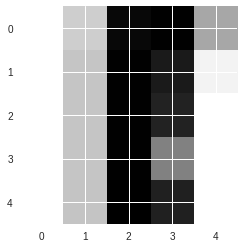

And the whole sample:


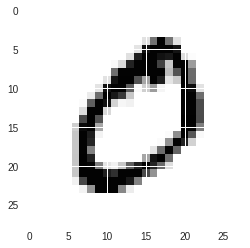

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [0]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [0]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [0]:
import keras

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [0]:
# Model parameters: W and b
W = tf.get_variable(shape = (784,10),name = 'weights') ### YOUR CODE HERE ### tf.get_variable(...) with shape[0] = 784
b = tf.get_variable(shape = (10), name ='bias')### YOUR CODE HERE ### tf.get_variable(...)

In [0]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape = (None,784) )### YOUR CODE HERE ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder('float32',shape = (None,10))### YOUR CODE HERE ### tf.placeholder(...) for one-hot encoded true labels

In [0]:
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###

logits = tf.layers.dense(input_X,784,activation = tf.nn.sigmoid)
logits12 = tf.layers.dense(logits,256,activation = tf.nn.sigmoid)
logits13 = tf.layers.dense(logits12,256,activation = tf.nn.sigmoid)
logits2 = tf.layers.dense(logits13,10)


probas = tf.nn.softmax(logits2)
classes = tf.argmax(probas,axis = 1) ### YOUR CODE HERE ### apply tf.argmax to find a class index with highest probability

# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = input_y,logits = logits2)) ### YOUR CODE HERE ### cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer(0.003).minimize(loss) ### YOUR CODE HERE ### optimizer step that minimizes the loss

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
from matplotlib import pyplot as plt
from IPython.display import clear_output, display_html, HTML
import contextlib
import time
import io
import urllib
import base64


def clear_and_display_figure(fig, sleep=0.01):
    img_data = io.BytesIO()
    fig.savefig(img_data, format='jpeg')
    img_data.seek(0)
    uri = 'data:image/jpeg;base64,' + urllib.request.quote(base64.b64encode(img_data.getbuffer()))
    img_data.close()
    clear_output(wait=True)
    display_html(HTML('<img src="' + uri + '">'))
    time.sleep(sleep)


class SimpleMovieWriter(object):
    """
    Usage example:
        anim = animation.FuncAnimation(...)
        anim.save(None, writer=SimpleMovieWriter(sleep=0.01))
    """
    def __init__(self, sleep=0.1):
        self.sleep = sleep

    def setup(self, fig):
        self.fig = fig

    def grab_frame(self, **kwargs):
        clear_and_display_figure(self.fig, self.sleep)

    @contextlib.contextmanager
    def saving(self, fig, *args, **kwargs):
        self.setup(fig)
        try:
            yield self
        finally:
            pass


class SimpleTrainingCurves(object):
    def __init__(self, loss_name, metric_name):
        self.fig, (self.ax1, self.ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        self.ax1.set_title(loss_name)
        self.ax2.set_title(metric_name)
        self.train_loss_curve, = self.ax1.plot([], [], 'r', label='train', lw=2)
        self.valid_loss_curve, = self.ax1.plot([], [], 'g', label='valid', lw=2)
        self.train_metric_curve, = self.ax2.plot([], [], 'r', label='train', lw=2)
        self.valid_metric_curve, = self.ax2.plot([], [], 'g', label='valid', lw=2)
        self.iter = 0
        self.y_limits_1 = [None, None]
        self.y_limits_2 = [None, None]
        plt.close(self.fig)

    def _update_y_limits(self, limits, *values):
        limits[0] = min(list(values) + ([limits[0]] if limits[0] else []))
        limits[1] = max(list(values) + ([limits[1]] if limits[1] else []))

    def _update_curve(self, curve, value, label):
        x, y = curve.get_data()
        curve.set_data(list(x) + [self.iter], list(y) + [value])
        curve.set_label("{}: {}".format(label, value))

    def _set_y_limits(self, ax, limits):
        spread = limits[1] - limits[0]
        ax.set_ylim(limits[0] - 0.05*spread, limits[1] + 0.05*spread)

    def add(self, train_loss, valid_loss, train_metric, valid_metric):
        self._update_curve(self.train_loss_curve, train_loss, "train")
        self._update_curve(self.valid_loss_curve, valid_loss, "valid")
        self._update_curve(self.train_metric_curve, train_metric, "train")
        self._update_curve(self.valid_metric_curve, valid_metric, "valid")
        self.ax1.set_xlim(0, self.iter)
        self.ax2.set_xlim(0, self.iter)
        self._update_y_limits(self.y_limits_1, train_loss, valid_loss)
        self._update_y_limits(self.y_limits_2, train_metric, valid_metric)
        self._set_y_limits(self.ax1, self.y_limits_1)
        self._set_y_limits(self.ax2, self.y_limits_2)
        clear_and_display_figure(self.fig)
        self.ax1.legend()
        self.ax2.legend()
        self.iter += 1

In [0]:
s = tf.Session()
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 20


simpleTrainingCurves = SimpleTrainingCurves("cross-entropy", "accuracy")

for epoch in range(EPOCHS):
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        batch_losses.append(batch_loss)

    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDxPxd/wAFFP2PvAmoXmn%2BK/ipc2gs9UbTReHwpqj2l5eLfw6fJb2lwlsYb2SO7nigkW3eQxOxD7drY2j%2B2f8As6R%2BObL4c3XjHUbfVLy6sLNlu/Cmpw29le3sUctpY3dw9sIbG8lSWIraXDxzkzRjy8uoPiVz%2Bxn%2B1bH4C8N/s66Zqfw9HgXwn8W9N8V22tXOo3r6rqtnb%2BLrXWxbyQC1EVrLHAlxFvEswuJFiJ%2Bzqzbeh8cfsffGzXfGPi3wPoup%2BFv%2BEA8c/F7QfHuq61dalcrrOnvp8mlTyWEVqtu0Mwll0mLbcNcRmJLhh5TmNSwB6Fa/t1fsv3cGr3w8f30Nno2n3N7LqV54U1OC0vYLedLeZ7G4ktli1HbNJHHi1aYlpEAB3rns/hT8ZfAXxp0m91fwJc6njTdQNlqVnrfh690q8tJxGkuyW1voYZ48xyxupZAGVwQSDmvmbTf2IPj5a6t4mtbTwl8ONN8MazoOp22reBV8Za1feHfFN5cXcEsdw2mTwCPQGCJcEvZyTnzLkMRL5Q3egfs4/sm%2BOvDGmXP/AAu3xl4hhgsfFa6n4L8M6H8ZPEOpQaLbC3tla2mvpmtZtTheeGSUQXUbxRLKY1BQnIB0kX7eP7Kk0fiC6HxNlW18N6Jqur32oy%2BHdQS0urLTSRfzWVw1uItSFuRiQWjTFSQCMkZ5vx3/AMFL/wBmXwh4Vl8TaPd%2BJtceDxF4b0yXTdP8Dav9qeLW78WdnfwxNaB7m1crO0c8IeOZoTFEzyvGjeKaH/wSx%2BI%2BjfBrXPgl5eiXX9m/DfxR4c8C%2BK9W%2BK/ia/LzajZT2VtI%2Bkz5sdLUQzFZjALjJGY0j4A7z4//ALEPxs8d%2BOH%2BIfw%2B1Pwo9zp/hz4cxaTp2r6nc20dzfeG/FE2szxSyRW0phhlidIklVJGDliYsAbgD1V/25/2ZFtteu4/G%2BpzJ4b8Sf8ACPakLbwfqsrPq/nPCdOt1S1JvLsOhJggEkgQrIV2MrGpqn/BQX9lDSbTRp5PH%2Bq3U%2Bv2Wq3WmaXpfgnWLy/ZNMuIrfUFks4LR7iGW3lmRZIpI1kT5iVwjleFtv2OvjToXha08QaFfeFZvFegftCaz8R9G0y61O5j0%2B%2Bgvl1C3NnPcrbNJDILbUZSJFhlCyxJ8rCvMNI%2BEf7S3wX/AG5vCGqeD9N8Dav478U%2BA/iX4l1jSNT128tdItftmt%2BFwlvBdpZyzN5Srb5kNuvnFZfli8wbQD6jsf2yP2adU8Gaz8QtK%2BKVvd6PoNxpMGoXtpY3MoLapDaTaeYVWMtcrcJfWvlvCHVmkKZ3I6r6bXwN8Nv2Q7XwR%2B1Z8Ff2dvBXxLsNdsPh58M9Ff432dmnD3ugLu8PPKqki2klutRnuUjf52i06PGVQGvvmgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArzb4q/tdfs/fBPxlH4D%2BJPje4stR%2By2l1efZ9Bvru3023urh7a2nvbi3geGwilmjkRJLl41YxvgnY2PSa%2BQ/28f2Kv2o/2pNZ8Z6N4R%2BIWn/8I5rvhC0s/DFtqHxB1rSoNGvoXnkm8/TtPi8jU47ljApluZG8hVJWCXbscA9gh/br/ZUku9btpviqtrFoGn6hfXeoahot7bWVzb2EywXslndSwrDqAhldI3%2ByvKVd1U8sAdDwJ%2B2B%2Bz78R/EmneC/DXjC%2Bj1vVNTutPt9D1fwzqOnX0Vzb2kd5LHPb3dvHLbH7NLHMvnKgkSRShbIrwzQ/wBjX9rW8/ZXP7IXiDWvh5pWgaLpEn9ga1ZX99qF3qF9FqUN9YC5R7e3W2hjMRinKNO1xuDqIOYz1/jH4S/tp%2BNfiB4H%2BPWqaH8ME1/wZ4l1CS08HQeJtQWzGmXel/ZHLambAyTXAnHnAfY408s%2BVnK%2BawB2uh/t0/steJddsPDmh/EuW4utR0KfWotnh7UBFDpsM9zbzXk8pg8u1gSa0njaSZkUMEBP72Le3w9%2B3Z%2By74m8J6741sviFe21l4dsdPvdSj1fwrqdhctbX8jRWM0Ftc20c13Hcyq0UDQJIJpAUjLN8teO/s%2BfsI/tK/Bjw3q7xfFHwvY%2BKLj4J3fhXR/EWlxzSrY61Jq2rX0V6IZYgDAn263baWJ3RuuCAGbkrH/gnN%2B1HceNNR%2BImoa74div59G8Iz2dvrXxT1/xIw1jw7r39rQrLc6hbB/st3vlR/JSJbU7WjgmJY0AfUHw9/bC/Z2%2BJ%2Buy%2BF/Cnj%2BRdTttLvdQvdN1fRL3Tbizgs5Yorrz47uGJoHia4ty8UgWRVnicrskRj2nw98e%2BFvip4C0T4m%2BBr%2BS70XxFpNvqWkXU1nLbtNazxrLE5imVJIyUZTtdVYZwQDxXxx%2B3H8PfjP8Ybb4c/D3xh4x8IaH8UvFXjTUNFj8PeD724unh8D6lZNaa0vnSpDLMYoUS7N2YYIxPDbRBdxQyfbOnadYaRp8Gk6XZx29rawrDbW8KBUijUAKqgcAAAAD2oAmooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKzPFWs3eh6el3aJGzNMEIkUkYwT2I9K068q%2BNPxgHhz41%2BC/gdLpaMnivQNb1VL4ykNFJp8mnIIguMEOt/IxOePJHB3HCdSnTlHn2bS%2Bbdl%2BJ04XB4nHTlChG7jGc3/AIYR5pP5R1sdH/wsPWv%2BfW1/74b/AOKo/wCFh61/z62v/fDf/FVg0V3ezh2OO7N7/hYetf8APra/98N/8VR/wsPWv%2BfW1/74b/4qsGij2cOwXZ0ieO9YbT5bs29tuSaNANjYwwcn%2BL/ZFQ/8LD1r/n1tf%2B%2BG/wDiqy4f%2BQLcf9fUP/oMtVaSpw7Bdm9/wsPWv%2BfW1/74b/4qj/hYetf8%2Btr/AN8N/wDFVg0U/Zw7Bdm9/wALD1r/AJ9bX/vhv/iqmTx3rDafLdm3ttyTRoBsbGGDk/xf7Irm6tQ/8gW4/wCvqH/0GWk6cOwXZqf8LD1r/n1tf%2B%2BG/wDiqP8AhYetf8%2Btr/3w3/xVYNFP2cOwXZv